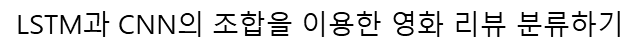

*Internet Movie Database, IMDB
- 영화와 관련된 정보와 출연진 정보, 개봉 정보, 영화 후기, 평점에 이르기까지 매우 폭넓은 데이터가 저장된 자료
- 영화에 관해 남긴 2만 5000여 개의 영화 리뷰가 담겨 있으며, 해당 영화를 긍정적으로 평가했는지 혹은 부정적으로 평가했는지도 담겨 있음
- 각 단어에 대한 전처리를 마친 상태로 데이터셋에서 나타나는 빈도에 따라 번호가 정해지므로 빈도가 높은 데이터를 불러와 학습시킬 수 있음

* 클래스가 긍정 또는 부정 두 가지뿐이라 원-핫 인코딩 과정은 없음

In [1]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [3]:
# 학습셋, 테스트셋 지정하기
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

# 데이터 전처리
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [4]:
# 모델의 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

# 모델의 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         500000    
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 55)                26400     
_________________________________________________________________
dense (Dense)                (None, 1)                 56        
_________________________________________________________________
activation (Activation)      (None, 1)                 0

In [5]:
# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
250/250 [==============================] - 12s 17ms/step - loss: 0.5558 - accuracy: 0.6808 - val_loss: 0.3672 - val_accuracy: 0.8382
Epoch 2/5
250/250 [==============================] - 4s 15ms/step - loss: 0.2921 - accuracy: 0.8795 - val_loss: 0.3338 - val_accuracy: 0.8562
Epoch 3/5
250/250 [==============================] - 4s 14ms/step - loss: 0.2426 - accuracy: 0.9000 - val_loss: 0.3246 - val_accuracy: 0.8590
Epoch 4/5
250/250 [==============================] - 4s 14ms/step - loss: 0.2000 - accuracy: 0.9228 - val_loss: 0.3296 - val_accuracy: 0.8552
Epoch 5/5
250/250 [==============================] - 3s 14ms/step - loss: 0.1701 - accuracy: 0.9387 - val_loss: 0.3489 - val_accuracy: 0.8544


782/782 [==============================] - 3s 3ms/step - loss: 0.3489 - accuracy: 0.8544

 Test Accuracy: 0.8544


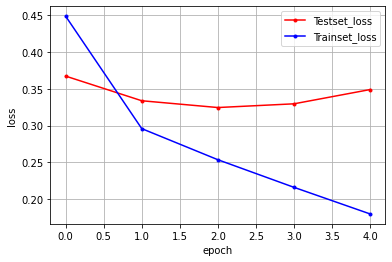

In [6]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


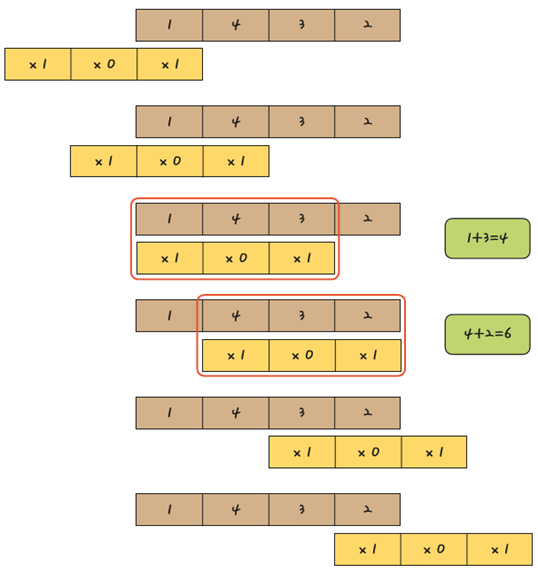

- 노란색 레이어는 커널을 의미함.
- 커널이 지나가면서 원래의 1차원 배열에 가중치를 각각 곱하여 새로운 층인 컨볼루션 층을 만듬.
- MaxPooling1D 마찬가지로 2차원 배열이 1차원으로 바뀌어 정해진 구역 안에서 가장 큰 값을 다음 층으로 넘기고 나머지는 버림.

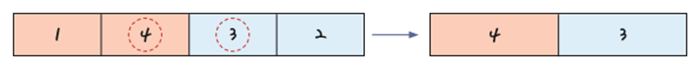